In [1]:
## Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import data
raw_data = pd.read_csv('Energy.csv')
raw_data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
# Check for missing values
raw_data.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [4]:
# Description of data
raw_data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [5]:
data = raw_data.copy()

In [6]:
# Scatter plot of independent variables against dependent variable

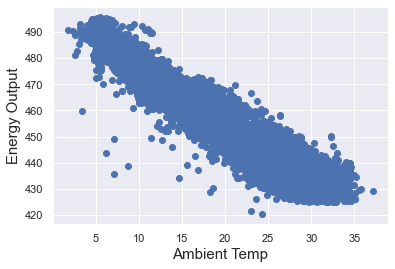

In [7]:
plt.scatter(data['AT'], data['PE'])
plt.xlabel('Ambient Temp', fontsize = 15)
plt.ylabel('Energy Output', fontsize = 15)
plt.show()

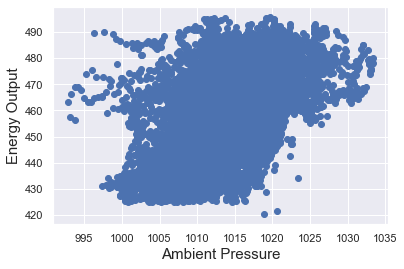

In [8]:
plt.scatter(data['AP'], data['PE'])
plt.xlabel('Ambient Pressure', fontsize = 15)
plt.ylabel('Energy Output', fontsize = 15)
plt.show()

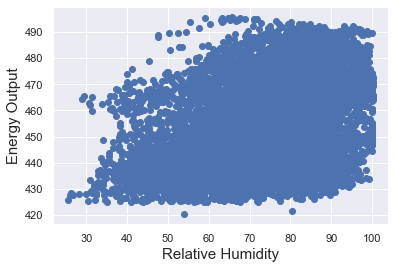

In [9]:
plt.scatter(data['RH'], data['PE'])
plt.xlabel('Relative Humidity', fontsize = 15)
plt.ylabel('Energy Output', fontsize = 15)
plt.show()

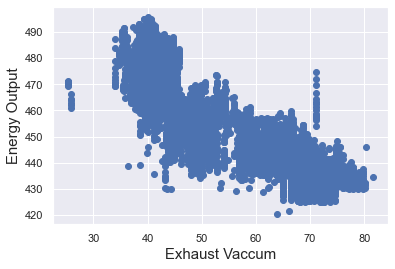

In [10]:
plt.scatter(data['V'], data['PE'])
plt.xlabel('Exhaust Vaccum', fontsize = 15)
plt.ylabel('Energy Output', fontsize = 15)
plt.show()

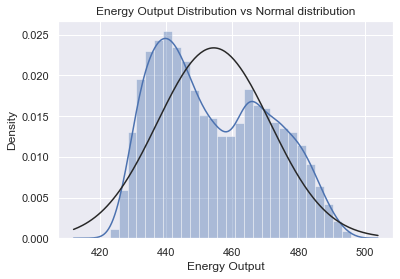

In [11]:
from scipy.stats import norm
(avge, std_dev) = norm.fit(data['PE'])
plt.figure()
sns.distplot(a = data['PE'], hist = True, kde = True, fit = norm)
plt.title('Energy Output Distribution vs Normal distribution')
plt.xlabel('Energy Output')
plt.show()

<AxesSubplot:xlabel='PE'>

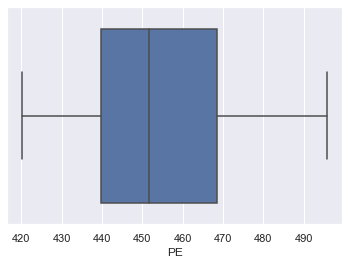

In [12]:
sns.boxplot(data['PE'], orient = 'v')

In [13]:
## Data split into features and target
inputs = data.drop(['PE'], axis = 1)
target = data['PE']

In [14]:
inputs.shape, target.shape

((9568, 4), (9568,))

In [15]:
# Split data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, random_state = 42)

In [16]:
# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
## Linear Regression
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [20]:
# Linear regression predict
y_lr_pred = lr.predict(x_train)
np.set_printoptions(precision =2)
print(np.concatenate((y_lr_pred.reshape(len(y_lr_pred), 1), y_train.values.reshape(len(y_train), 1)), 1))

[[448.44 443.31]
 [475.09 490.96]
 [478.15 483.94]
 ...
 [439.09 435.06]
 [469.58 471.13]
 [469.7  472.43]]


In [21]:
from sklearn.metrics import r2_score
sc_1 = r2_score(y_train, y_lr_pred).round(2)
sc_1

0.93

In [22]:
from sklearn.metrics import mean_squared_error
y_lr_mse = mean_squared_error(y_train, y_lr_pred)
y_lr_rmse = np.sqrt(y_lr_mse).round(2)
y_lr_rmse

4.57

In [23]:
# Polynomial Regression 

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)

In [25]:
x_poly = poly.fit_transform(x_train)

In [26]:
pr = LinearRegression()
pr.fit(x_poly, y_train)

LinearRegression()

In [27]:
y_pr_pred = pr.predict(x_poly)
np.set_printoptions(precision =2)
print(np.concatenate((y_pr_pred.reshape(len(y_pr_pred), 1), y_train.values.reshape(len(y_train), 1)), 1))

[[447.73 443.31]
 [474.72 490.96]
 [479.81 483.94]
 ...
 [439.37 435.06]
 [470.38 471.13]
 [470.33 472.43]]


In [28]:
sc_2 = r2_score(y_train, y_pr_pred).round(2)
sc_2

0.94

In [29]:
y_pr_mse = mean_squared_error(y_train, y_pr_pred)
y_pr_rmse = np.sqrt(y_pr_mse).round(2)
y_pr_rmse

4.26

In [30]:
## Support Vector Regression
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(x_train, y_train)

SVR()

In [31]:
y_svr_pred = svr.predict(x_train)

In [32]:
np.set_printoptions(precision =2)
print(np.concatenate((y_svr_pred.reshape(len(y_svr_pred), 1), y_train.values.reshape(len(y_train), 1)), 1))

[[447.22 443.31]
 [475.68 490.96]
 [481.16 483.94]
 ...
 [437.41 435.06]
 [472.04 471.13]
 [469.81 472.43]]


In [33]:

sc_4 = r2_score(y_train, y_svr_pred).round(2)
sc_4

0.94

In [34]:
y_svr_mse = mean_squared_error(y_train, y_svr_pred)
y_svr_rmse = np.sqrt(y_svr_mse).round(2)
y_svr_rmse

4.15

In [35]:
## Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [36]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [37]:
y_rfr_pred = rfr.predict(x_train)

In [38]:
np.set_printoptions(precision =2)
print(np.concatenate((y_rfr_pred.reshape(len(y_rfr_pred), 1), y_train.values.reshape(len(y_train), 1)), 1))

[[444.48 443.31]
 [489.27 490.96]
 [483.25 483.94]
 ...
 [435.33 435.06]
 [470.01 471.13]
 [472.4  472.43]]


In [39]:
sc_5 = r2_score(y_train, y_rfr_pred).round(2)
sc_5

0.99

In [40]:
y_rfr_mse = mean_squared_error(y_train, y_rfr_pred)
y_rfr_rmse = np.sqrt(y_rfr_mse).round(2)
y_rfr_rmse

1.27

In [41]:
## Model Evaluation Summary

In [42]:
Summary = pd.DataFrame()

In [43]:
Summary['Model'] = ['Linear Regression', 'Polynomial Regression', 'Support Vector', 'Random Forest']
Summary['R2'] = ([sc_1, sc_2, sc_4, sc_5])
Summary['Error'] = ([y_lr_rmse, y_pr_rmse, y_svr_rmse, y_rfr_rmse])

In [44]:
Summary.sort_values(by = ['Error'], ascending = False, inplace = True)
Summary

,Model,R2,Error
0,Linear Regression,0.93,4.57
1,Polynomial Regression,0.94,4.26
2,Support Vector,0.94,4.15
3,Random Forest,0.99,1.27


In [45]:
## Use test data on model with highest accuracy and lowest error - Random Forest
y_hat = rfr.predict(x_test)
sc_f = r2_score(y_hat, y_test).round(2)
sc_f

0.96

In [46]:
y_hat_mse = mean_squared_error(y_test, y_hat)
y_hat_rmse = np.sqrt(y_hat_mse).round(2)
y_hat_rmse

3.24